<a href="https://colab.research.google.com/github/moonyc/pytorch-labs/blob/main/01_pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch Workflow

Let's explore an example PyTorch end-to-end workflow.


In [ ]:
what_we_are_covering = {
                        1: 'data (prepare and load)',
                        2: 'build model',
                        3: 'fitting the model to data (training)',
                        4: 'making predictions and evaluating a model (inference)',
                        5: 'saving and loagind a model',
                        6: 'putting it all together'
                        }
what_we_are_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluating a model (inference)',
 5: 'saving and loagind a model',
 6: 'putting it all together'}

In [ ]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.1.0+cu118'

## 1. Data (preparing and loading)

Data can be almost anything... in machine learning.

* Excel spreadsheets
* Images
* VIdeos (YouTube has lots of data...)
* Audio like songs or podcasts
* DNA
* Text

Machine learning is a game of two parts:
1. Get data into a numerical representation.
2. Build a model to learn patterns in that numerical representation.

To showcase this, let's create some known data using the linear regression formula.

Y = a + bX

We'll use a linear regiression formula to make a straight line with known parameters.

In [ ]:
# Create known parameters
weight = 0.7
bias = 0.3


# Create
start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
Y = weight * X + bias

X[:10], Y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
len(X), len(Y)

(50, 50)

### Splitting data into training and test sets (one of the most important concepts in machine learning in general)

1. Training set
2. Validation set
3. Testing set

In terms of data this is the number one thing we need to be aware of.
The goal is the generalization:
the ability for a machine learning model to perform wewll on data it hasn't seen before.

Let's create a training set and a testing set without data

In [ ]:
 # Create a train/test split
train_split = int(0.8 * len(X))
X_train, Y_train = X[:train_split], Y[:train_split]
X_test, Y_test = X[train_split:], Y[train_split:]

# training features, labels | testing features, labels
len(X_train), len(Y_train), len(X_test), len(Y_test)

(40, 40, 10, 10)

In [ ]:
X_train, Y_train

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260],
         [0.4400],
         [0.4540],
         [

How might we better visualize our data?

In [ ]:
def plot_predictions(train_data=X_train,
                     train_labels=Y_train,
                     test_data=X_test,
                     test_labels=Y_test,
                     predictions=None) :
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(8,5))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test_data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  # Are there predictions?
  if predictions is not None:
      # Plot the predictions if they exist
      plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});


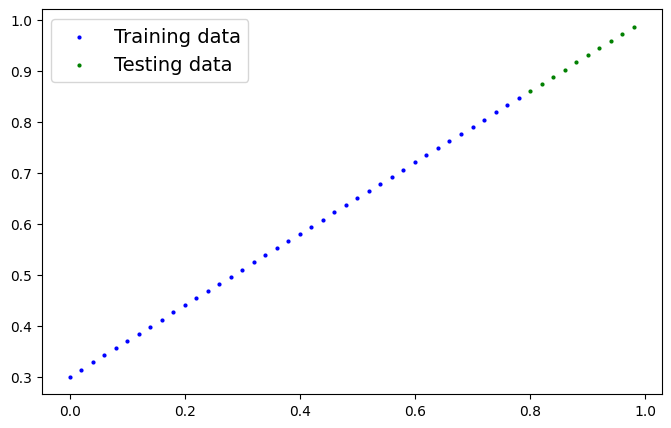

In [ ]:
plot_predictions();

## 2. Build a model

Our first PyTorch model

We're going to use classes throughout the course, we need to get familiar with OOP in Python.

Our model:
* Starts with random value (weight and bias)
* Looks at training data and adjust the random values to better represent (or get close) to the idead values (the weight and the bias we used to create the data)

How does it do so?

Through two main algorithms:
1. Gradient descent
2. Backpropagation


In [ ]:
from torch import nn
# Create a linear regression model class

class LinearRegressionModel(nn.Module): # <- almonst everything in PyTorch inherits from nn.module
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, # <- start with a random weight and try to adjust it to the ideal weight
                                          requires_grad=True, # <- can this parameter be updated via gradient descent?
                                          dtype=torch.float)) # <- PyTorch loves the datatype torch.float32
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))
  # Forward method to define the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor: # x <- "x" is the input data
      return self.weights * x + self.bias # linear regression formula

This model will take a weight, which has a random value, and the bias, which has a random value, and the forward method will execute on these the same formula of the linea regression. The linear regression was previously used to create our data. The model will adjust the weight and the bias as close as possible to the known parameters and this is the premise of machine learning.

### PyTorch model building essentials

* torch.nn - contains all of the building blocks for computational graphs, a neural network can be considered a computational graph
* torch.nn.Parameter - what parameters should our model try and learn, often a PyTorch layer from torch.nn will set these for us
* torch.nn.Module - the base class for all neural network modules, if you subclass it, you should overwrite forward()
* torch.optim - this where the optimizers in PyTorch live, they will help with gradient descent
* def forward() - all nn.module subclasses require you to overwrite forward(). This method defines what happens in forward computations.

In [ ]:
torch.randn(1)


tensor([0.2345])

### Checking the contents of our PyTorch model

Now we've created a model, let's see what's inside...

So we can check ou model parameters or what's inside our model using `.parameters()`

In [ ]:
# Create a random seed
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module)
model_0 = LinearRegressionModel()

# CHeck out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
# List names parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Making predictions using `torch.inference_mode()`

To check our model's predictive power, let's see how well it predict y_test, based on x_test

when we pass data through our model, it's going to run it throught our forward() method

In [ ]:
X_test, Y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [ ]:
# Make predictions with model
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

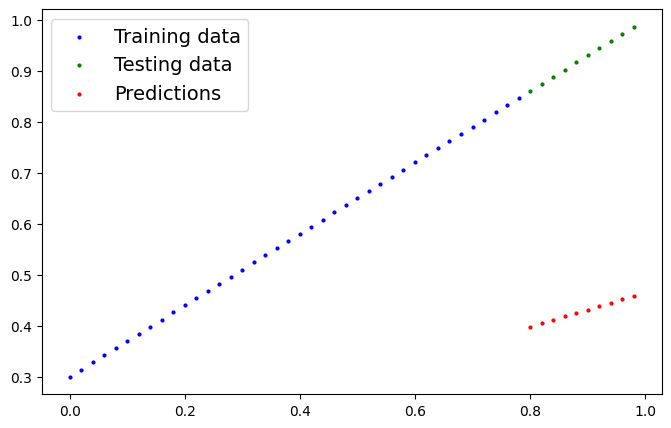

In [ ]:
plot_predictions(predictions=y_preds)